In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

max_date = session.query(func.max(Measurement.date)).first()

In [11]:
max_date 

('2017-08-23',)

In [12]:
year_ago = dt.date(2017,8,23)- dt.timedelta(days = 365)

In [13]:
year_ago 

datetime.date(2016, 8, 23)

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set. akd the most recent

precip_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > (dt.date(2017,8,23)- dt.timedelta(days = 365)) ).all()
#precip_data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_precip_data =  pd.DataFrame(precip_data)

df_precip_data

# Sort the dataframe by date
#df_precip_data.sort_values(by='prcp', ascending=False)
#df_precip_data
# Use Pandas Plotting with Matplotlib to plot the data
#pandas
 
###ADD GRID AND FIX DATES



#df_precip_data.plot.bar(x='date', y='prcp', rot=0)
#plt.xlabel("Date")
#plt.ylabel("Inches")

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
station_cnt = session.query(func.count(station.station)).all()

In [16]:
station_cnt

[(9,)]

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_station =session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()


active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
most_active_station = session.query(*sel).\
    filter(Measurement.station == "USC00519281").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()

most_active_station


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

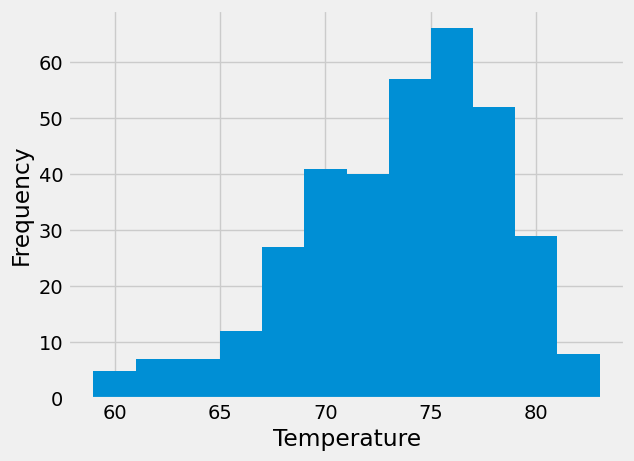

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#temp_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date > (dt.date(2017,8,23)- dt.timedelta(days = 365)), Measurement.station == "USC00519281").all()
temp_data = session.query(Measurement.tobs).filter(Measurement.date > (dt.date(2017,8,23)- dt.timedelta(days = 365)), Measurement.station == "USC00519281").all()
df_temp_data =  pd.DataFrame(temp_data)

df_temp_data 
##temp_data


plt.hist(df_temp_data, bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
######################plt.legend=True

# Close Session

In [20]:
# Close Session
session.close()